Based on [scikit-learn example](https://scikit-learn.org/0.16/auto_examples/linear_model/plot_iris_logistic.html#example-linear-model-plot-iris-logistic-py)

[Documentation](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusión:
[[19  0]
 [ 0 26]]


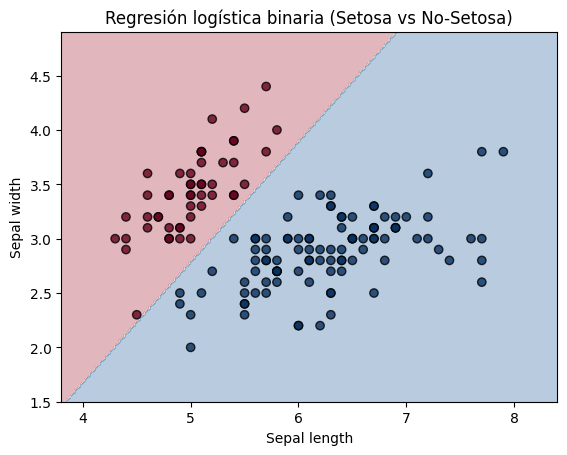

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset
iris = load_iris()
X = iris.data[:, :2]  # tomamos solo 2 features (sepal length y sepal width) para visualizar
y = (iris.target != 0).astype(int)  # binario: 0 si setosa, 1 si versicolor o virginica

# Dividir en train/test
# Usamos 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
# ------------------------------
# Ver de agregar hyperparámetros
# ------------------------------
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficar frontera de decisión (Decision Boundary)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, alpha=0.8)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Regresión logística binaria (Setosa vs No-Setosa)")
plt.show()
